In [202]:
import numpy as np
import pandas as pd


In [203]:
#MANNUALY CONSTRUCTED DATASET
file=pd.read_csv("TechnoVerse_Fraudent_Data_CSV.csv")

In [204]:
file


,ID,Communication_Type,Sender,Reciever,Date,Content,Fraud
0,1,Phone,Welfare Organization,John Smith,02-12-2023,"Hello John, we are calling to inform you about...",0
1,2,Email,welfare.org@example.com,Emma Johnson,05-06-2023,"Dear Emma, we would like to notify you that yo...",0
2,3,Phone,Welfare Support,Christopher Davis,11-06-2023,"Hello Christopher, we are calling to remind yo...",0
3,4,Email,welfarehelp@example.com,Olivia Wilson,18-06-2023,"Dear Olivia, we have received your request for...",0
4,5,Phone,Welfare Organization,Ethan Thompson,08-06-2023,"Hello Ethan, we are calling to inform you abou...",0
...,...,...,...,...,...,...,...
531,532,Email,welfare.org@example.com,Logan Wilson,19-12-2023,"Dear Logan, we want to raise awareness about f...",0
532,533,Phone,Welfare Organization,Chloe Thompson,20-12-2023,"Hello Chloe, we would like to inform you about...",0
533,534,Email,welfare.support@example.com,Liam Davis,21-12-2023,"Dear Liam, we want to raise awareness about th...",0
534,535,Phone,Welfare Support,Harper Wilson,22-12-2023,"Hello Harper, we would like to alert you about...",0


In [205]:
#DATA ANALYSIS
file.isnull().sum()

ID                    0
Communication_Type    0
Sender                0
Reciever              0
Date                  0
Content               0
Fraud                 0
dtype: int64

In [206]:
file.info

<bound method DataFrame.info of       ID Communication_Type                       Sender           Reciever  \
0      1              Phone         Welfare Organization         John Smith   
1      2              Email      welfare.org@example.com       Emma Johnson   
2      3              Phone              Welfare Support  Christopher Davis   
3      4              Email      welfarehelp@example.com      Olivia Wilson   
4      5              Phone         Welfare Organization     Ethan Thompson   
..   ...                ...                          ...                ...   
531  532              Email      welfare.org@example.com       Logan Wilson   
532  533              Phone         Welfare Organization     Chloe Thompson   
533  534              Email  welfare.support@example.com         Liam Davis   
534  535              Phone              Welfare Support      Harper Wilson   
535  536              Email     welfare.help@example.com     Scarlett Davis   

           Date    

In [207]:
file.shape

(536, 7)

In [208]:
file.describe()

,ID,Fraud
count,536.000000,536.000000
mean,268.500000,0.309701
std,154.874142,0.462802
min,1.000000,0.000000
25%,134.750000,0.000000
50%,268.500000,0.000000
75%,402.250000,1.000000
max,536.000000,1.000000


In [210]:
file.columns

Index(['ID', 'Communication_Type', 'Sender', 'Reciever', 'Date', 'Content',
       'Fraud'],
      dtype='object')

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

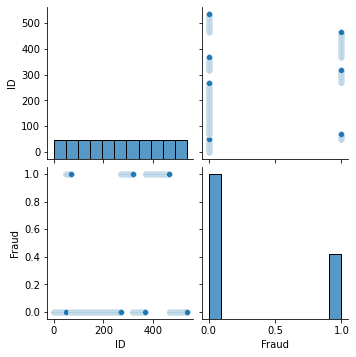

In [256]:
sns.pairplot(file)

<AxesSubplot:>

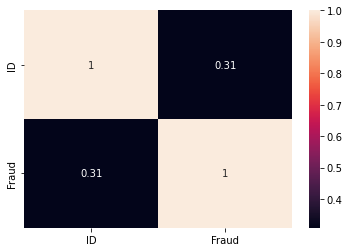

In [257]:
sns.heatmap(file.corr(),  annot= True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fraud', ylabel='Density'>

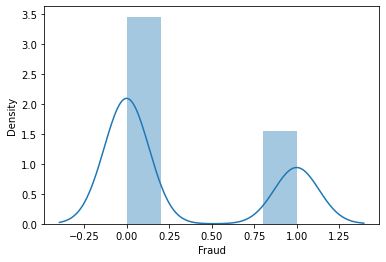

In [259]:
sns.distplot(file.Fraud)

In [212]:
#NOT CONSIDERING OTHER FEATURES BECAUSE OF THERE INDEPENDENCY
x=file[['Content']]
y=file[['Fraud']]

In [213]:
x

,Content
0,"Hello John, we are calling to inform you about..."
1,"Dear Emma, we would like to notify you that yo..."
2,"Hello Christopher, we are calling to remind yo..."
3,"Dear Olivia, we have received your request for..."
4,"Hello Ethan, we are calling to inform you abou..."
...,...
531,"Dear Logan, we want to raise awareness about f..."
532,"Hello Chloe, we would like to inform you about..."
533,"Dear Liam, we want to raise awareness about th..."
534,"Hello Harper, we would like to alert you about..."


In [214]:
y

,Fraud
0,0
1,0
2,0
3,0
4,0
...,...
531,0
532,0
533,0
534,0


In [215]:
#DATA CLEANING AND PREPROCESSING
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
c = []
for i in range(0, len(file)):
    r=re.sub('[^a-zA-Z]', ' ',file['Content'][i])
    r=r.lower()
    r=r.split()
    r=[ps.stem(word) for word in r if not word in stopwords.words('english')]
    r=' '.join(r)
    c.append(r)
c

['hello john call inform upcom chang welfar program guidelin start next month revis elig criteria benefit amount question need clarif pleas contact offic thank attent',
 'dear emma would like notifi welfar benefit month june success process fund deposit design bank account within next busi day concern pleas let us know best regard xyz welfar organ',
 'hello christoph call remind upcom deadlin submit annual incom statement pleas ensur provid necessari document june th avoid disrupt benefit need assist question feel free contact offic thank',
 'dear olivia receiv request hous assist team current review applic notifi decis via mail within next month urgent concern pleas contact helplin thank patienc',
 'hello ethan call inform upcom workshop financi literaci money manag welfar program particip workshop held juli th commun center highli recommend attend gain valuabl insight tool better financi plan great day',
 'dear sophia would like inform request childcar assist approv start next month 

In [216]:
#NATURAL LANGUAGE PROCESSING
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
x = cv.fit_transform(c).toarray()
print(x)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.14123566 ... 0.14123566 0.         0.10587205]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.0714139  ... 0.         0.         0.        ]
 [0.         0.         0.07385149 ... 0.07385149 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.05492922]]


In [239]:
from sklearn.model_selection import train_test_split
x_t, x_test, y_t, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [240]:
x_t

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.12653325, ..., 0.        , 0.        ,
        0.09485094],
       [0.        , 0.        , 0.24938346, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07731344],
       [0.        , 0.        , 0.        , ..., 0.15707578, 0.        ,
        0.11774601],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10435131]])

In [241]:
#IMPLEMENTATION USING NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import MultinomialNB
fraud_detect_model = MultinomialNB().fit(x_t, y_t)

y_pred=fraud_detect_model.predict(x_t)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [242]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [243]:
import matplotlib.pyplot as plt

In [244]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_pred,y_t))

[[286   0]
 [  5 137]]


In [245]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_t))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       286
           1       1.00      0.96      0.98       142

    accuracy                           0.99       428
   macro avg       0.99      0.98      0.99       428
weighted avg       0.99      0.99      0.99       428



In [246]:
#ACCURACY
from sklearn import metrics
print(metrics.r2_score(y_pred,y_t))

0.9473062149118487


In [252]:
#NEW INPUT FOR PREDICTION
s=input()
r=[]
p=re.sub('[^a-zA-Z]', ' ',s)
p = p.lower()
p = p.split()
p = [ps.stem(word) for word in p if not word in stopwords.words('english')]
p = ' '.join(p)

r.append(p)

z=cv.transform(r).toarray()
z

hello this is speaking from maharaja welfare society, this is to make your attention about our recent donations, kindly provide your Bank or Credit Card details and futher provide the one time password for it to make your remark in our donations


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.31235869, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18881395,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.25697207, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [253]:
y_pred_2=fraud_detect_model.predict(z)

In [254]:
print(y_pred_2)

[1]


In [255]:
#RESULT
if y_pred_2[0]==1:
    print("Fraud detected")
else:
    print("Not a Fraud")

Fraud detected
